# IMPORTING LIBRARIES

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# LOADING DATASETS 

In [4]:
_10m_u_component_of_wind_10m_v_component_of_wind_2023 = xr.open_dataset('10m_u_component_of_wind_10m_v_component_of_wind_2023.nc')
_2m_dewpoint_temp_2023 = xr.open_dataset('2m_dewpoint_temp_2023.nc')
_2m_temp_blh_2023 = xr.open_dataset('2m_temp_blh_2023.nc')
merged_dataset = xr.concat([_2m_dewpoint_temp_2023,_10m_u_component_of_wind_10m_v_component_of_wind_2023,_2m_temp_blh_2023],dim='valid_time')
print(merged_dataset)

<xarray.Dataset>
Dimensions:     (valid_time: 26280, latitude: 26, longitude: 18)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
  * latitude    (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude   (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
    expver      (valid_time) object '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    d2m         (valid_time, latitude, longitude) float32 277.3 277.2 ... nan
    u10         (valid_time, latitude, longitude) float32 nan nan ... nan nan
    v10         (valid_time, latitude, longitude) float32 nan nan ... nan nan
    t2m         (valid_time, latitude, longitude) float32 nan nan ... 301.9
    blh         (valid_time, latitude, longitude) float32 nan nan ... 441.1
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Convent

# AVERGAGING VALUES FOR DUPLICATE TIMESTEPS TO REMOVE NAN VALUES

In [5]:
merged_dataset_average = merged_dataset.groupby('valid_time').mean()
print(merged_dataset_average)

<xarray.Dataset>
Dimensions:     (latitude: 26, longitude: 18, valid_time: 8760)
Coordinates:
    number      int64 0
  * latitude    (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude   (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
  * valid_time  (valid_time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Data variables:
    d2m         (valid_time, latitude, longitude) float32 277.3 277.2 ... 297.5
    u10         (valid_time, latitude, longitude) float32 -1.685 ... 0.208
    v10         (valid_time, latitude, longitude) float32 -2.264 -2.285 ... 3.73
    t2m         (valid_time, latitude, longitude) float32 295.3 295.4 ... 301.9
    blh         (valid_time, latitude, longitude) float32 172.8 170.5 ... 441.1
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Cen

# EXTRACTING DATA FOR DRY DAY

In [6]:
dry_day = merged_dataset_average.sel(valid_time='2023-12-15',longitude=slice('-3.24','1.01'),latitude=slice('4.71','10.96'))
print(dry_day)

<xarray.Dataset>
Dimensions:     (latitude: 1, longitude: 5, valid_time: 24)
Coordinates:
    number      int64 0
  * latitude    (latitude) float64 4.71
  * longitude   (longitude) float64 0.01 0.26 0.51 0.76 1.01
  * valid_time  (valid_time) datetime64[ns] 2023-12-15 ... 2023-12-15T23:00:00
Data variables:
    d2m         (valid_time, latitude, longitude) float32 295.8 295.9 ... 296.1
    u10         (valid_time, latitude, longitude) float32 -3.507 ... -2.84
    v10         (valid_time, latitude, longitude) float32 2.645 2.385 ... 2.434
    t2m         (valid_time, latitude, longitude) float32 301.4 301.3 ... 301.8
    blh         (valid_time, latitude, longitude) float32 502.5 509.6 ... 428.4
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:          

# CONVERTING 3D DATASET TO 1D DATAARRAY

In [7]:
dry_day_plot = dry_day.mean(dim=['latitude','longitude'])
print(dry_day_plot)

<xarray.Dataset>
Dimensions:     (valid_time: 24)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-12-15 ... 2023-12-15T23:00:00
Data variables:
    d2m         (valid_time) float32 295.8 295.8 295.8 ... 294.8 296.0 296.1
    u10         (valid_time) float32 -2.952 -2.937 -2.641 ... -2.36 -3.016 -2.89
    v10         (valid_time) float32 2.023 2.174 2.146 ... 2.304 2.31 2.658
    t2m         (valid_time) float32 301.3 301.2 301.2 ... 302.0 301.9 301.8
    blh         (valid_time) float32 527.5 508.1 490.8 ... 452.8 448.7 434.3


# EXTRACTING DATA FOR WET DAY

In [8]:
wet_day = merged_dataset_average.sel(valid_time='2023-06-15',longitude=slice('-3.24','1.01'),latitude=slice('4.71','10.96'))
print(wet_day)

<xarray.Dataset>
Dimensions:     (latitude: 1, longitude: 5, valid_time: 24)
Coordinates:
    number      int64 0
  * latitude    (latitude) float64 4.71
  * longitude   (longitude) float64 0.01 0.26 0.51 0.76 1.01
  * valid_time  (valid_time) datetime64[ns] 2023-06-15 ... 2023-06-15T23:00:00
Data variables:
    d2m         (valid_time, latitude, longitude) float32 295.2 295.4 ... 295.4
    u10         (valid_time, latitude, longitude) float32 4.602 4.654 ... 3.759
    v10         (valid_time, latitude, longitude) float32 4.52 4.529 ... 5.016
    t2m         (valid_time, latitude, longitude) float32 300.7 300.6 ... 301.2
    blh         (valid_time, latitude, longitude) float32 906.2 888.0 ... 941.2
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:      

# CONVERTING 3D DATASET TO 1D DATAARRAY

In [9]:
wet_day_plot = wet_day.mean(dim=['latitude','longitude'])
print(wet_day_plot)

<xarray.Dataset>
Dimensions:     (valid_time: 24)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-06-15 ... 2023-06-15T23:00:00
Data variables:
    d2m         (valid_time) float32 295.5 295.7 295.7 ... 295.3 295.1 295.3
    u10         (valid_time) float32 4.707 4.619 4.498 ... 3.326 3.493 3.685
    v10         (valid_time) float32 4.605 4.554 4.583 ... 5.362 5.282 5.017
    t2m         (valid_time) float32 300.5 300.2 300.0 ... 301.0 301.1 301.1
    blh         (valid_time) float32 858.9 847.7 816.5 ... 960.8 942.2 941.5


# DEW POINT TIME SERIES PLOT FOR DRY DAY (2023-12-15) vs DEW POINT TIME SERIES PLOT FOR WET DAY (2023-06-15)

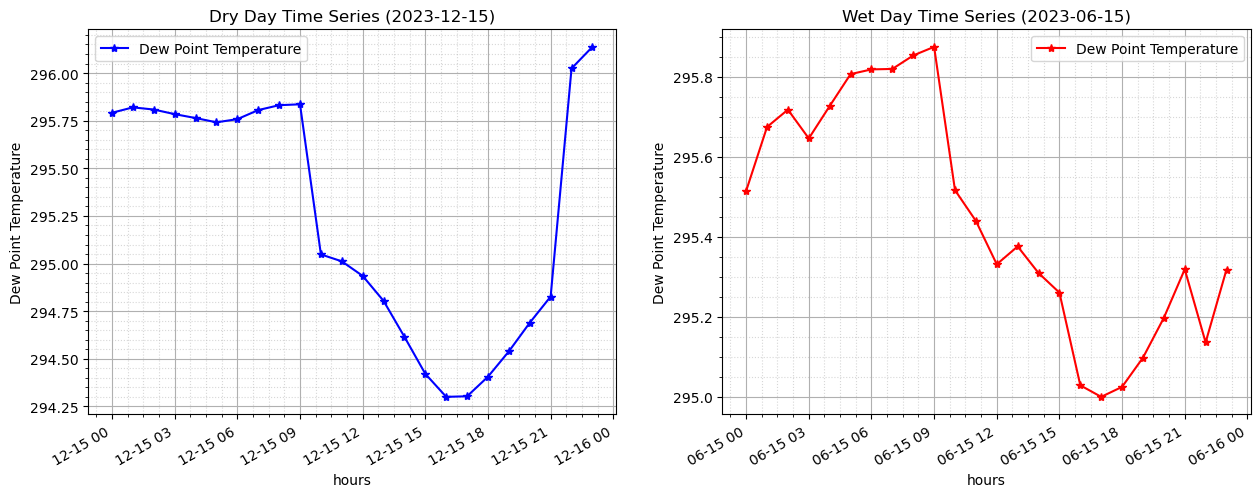

In [10]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
dry_day_plot['d2m'].plot(color='blue',label='Dew Point Temperature',marker='*')
plt.xlabel('hours')
plt.ylabel('Dew Point Temperature')
plt.title('Dry Day Time Series (2023-12-15)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()




plt.subplot(1,2,2)
wet_day_plot['d2m'].plot(color='red',label='Dew Point Temperature',marker='*')
plt.xlabel('hours')
plt.ylabel('Dew Point Temperature')
plt.title('Wet Day Time Series (2023-06-15)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()
plt.show()


# CALCULATING WIND SPEED FOR DRY DAY 

In [11]:
dry_day_windspeed = np.sqrt(dry_day_plot['u10']**2 + dry_day_plot['v10']**2)
print(dry_day_windspeed)

<xarray.DataArray (valid_time: 24)>
array([3.5788639, 3.654516 , 3.4029474, 2.8615274, 2.4010673, 2.029045 ,
       1.7986821, 1.6157303, 1.6879923, 1.6577127, 1.9495474, 2.2991571,
       2.7099931, 2.9001784, 2.8240128, 2.62596  , 2.265891 , 2.2422206,
       2.3264751, 2.600204 , 2.9535687, 3.2982419, 3.7988575, 3.9262404],
      dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-12-15 ... 2023-12-15T23:00:00


# CALCULATING WIND SPEED FOR WET DAY 

In [12]:
wet_day_windspeed = np.sqrt(wet_day_plot['u10']**2 + wet_day_plot['v10']**2)
print(wet_day_windspeed)

<xarray.DataArray (valid_time: 24)>
array([6.584728 , 6.4860244, 6.422112 , 6.4969306, 6.7486954, 6.923227 ,
       7.037026 , 6.955849 , 6.8322215, 6.7316384, 6.234382 , 6.198638 ,
       6.082704 , 6.2203526, 6.500625 , 6.7022815, 6.8726816, 6.9771523,
       6.783381 , 6.448818 , 6.456404 , 6.3099766, 6.3321986, 6.22486  ],
      dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-06-15 ... 2023-06-15T23:00:00


# WIND SPEED TIME SERIES PLOT FOR DRY DAY (2023-12-15) vs WIND SPEED TIME SERIES PLOT FOR WET DAY (2023-06-15)

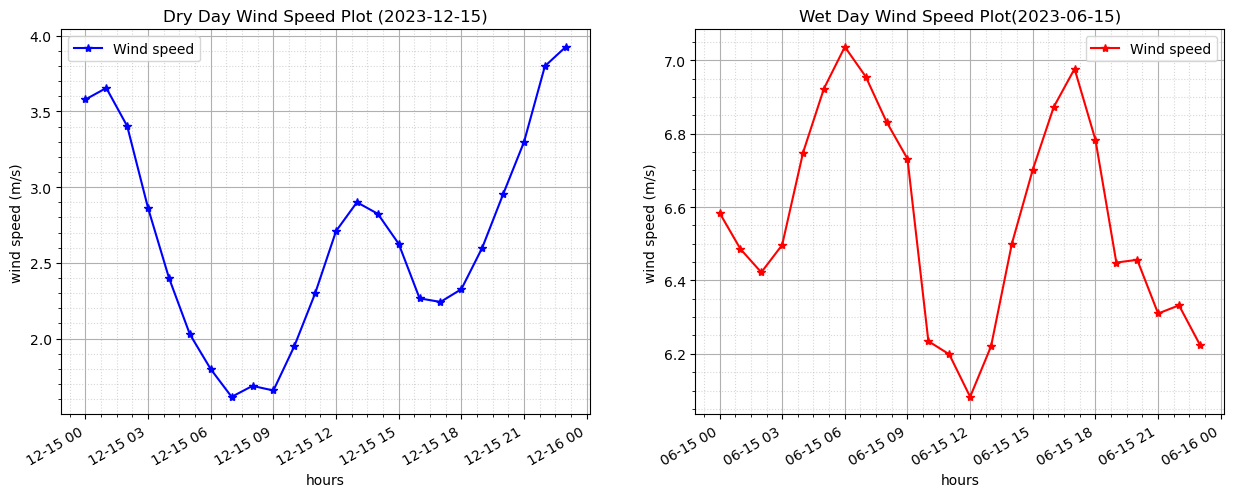

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
dry_day_windspeed.plot(color='blue',label='Wind speed',marker='*')
plt.xlabel('hours')
plt.ylabel('wind speed (m/s)')
plt.title('Dry Day Wind Speed Plot (2023-12-15)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
wet_day_windspeed.plot(color='red',label='Wind speed',marker='*')
plt.xlabel('hours')
plt.ylabel('wind speed (m/s)')
plt.title('Wet Day Wind Speed Plot(2023-06-15)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()

plt.show()




# EXTRACTING DRY DAY TEMPERATURE DATASET

In [14]:
Dry_day_temperature = merged_dataset_average['t2m'].sel(valid_time='2023-12-15',longitude=slice('-3.24','1.01'),latitude=slice('4.71','10.96'))
print(Dry_day_temperature)

<xarray.DataArray 't2m' (valid_time: 24, latitude: 1, longitude: 5)>
array([[[301.41467, 301.31763, 301.28503, 301.30444, 301.35718]],

       [[301.31982, 301.22192, 301.19434, 301.20215, 301.22156]],

       [[301.25574, 301.1416 , 301.11462, 301.12183, 301.1311 ]],

       [[301.1726 , 301.07568, 301.0515 , 301.05664, 301.06982]],

       [[301.1167 , 301.01562, 300.98682, 301.00146, 301.01538]],

       [[301.09277, 300.99927, 300.9546 , 300.97314, 301.0066 ]],

       [[301.08252, 300.98828, 300.9309 , 300.9453 , 300.9829 ]],

       [[301.11792, 301.02734, 300.97363, 300.99487, 301.0476 ]],

       [[301.22302, 301.1106 , 301.06628, 301.099  , 301.13635]],

       [[301.36914, 301.22546, 301.21826, 301.23438, 301.255  ]],

...
       [[301.9348 , 301.88074, 301.94373, 301.9635 , 301.9668 ]],

       [[302.0647 , 301.99536, 302.07556, 302.07214, 302.0891 ]],

       [[302.14783, 302.10474, 302.17053, 302.1598 , 302.20117]],

       [[302.16064, 302.12183, 302.14905, 302.16675, 302

# CONVERTING 3D DATASET TO 1D DATAARRAY

In [15]:
Dry_day_temperature_plot = Dry_day_temperature.mean(dim=['latitude','longitude'])
print(Dry_day_temperature_plot)

<xarray.DataArray 't2m' (valid_time: 24)>
array([301.3358 , 301.23196, 301.15298, 301.08527, 301.0272 , 301.00528,
       300.986  , 301.0323 , 301.12704, 301.26044, 301.37888, 301.55173,
       301.65836, 301.82706, 301.93793, 302.0594 , 302.1568 , 302.17136,
       302.10602, 302.04758, 302.0089 , 301.9688 , 301.90225, 301.84338],
      dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-12-15 ... 2023-12-15T23:00:00


# EXTRACTING WET DAY TEMPERATURE DATASET

In [16]:
Wet_day_temperature = merged_dataset_average['t2m'].sel(valid_time='2023-06-15',longitude=slice('-3.24','1.01'),latitude=slice('4.71','10.96'))
print(Wet_day_temperature)

<xarray.DataArray 't2m' (valid_time: 24, latitude: 1, longitude: 5)>
array([[[300.6637 , 300.58142, 300.5016 , 300.4602 , 300.47986]],

       [[300.23035, 300.2157 , 300.19373, 300.1162 , 300.13074]],

       [[299.9983 , 300.0144 , 300.08606, 300.0537 , 300.03027]],

       [[299.98987, 299.96606, 299.95825, 299.97046, 299.94678]],

       [[300.0277 , 300.0144 , 299.96216, 299.94104, 299.94116]],

       [[299.9463 , 299.9585 , 299.94946, 299.92078, 299.9342 ]],

       [[299.9336 , 299.9751 , 299.99475, 300.01416, 300.07068]],

       [[300.00513, 300.04626, 300.1151 , 300.15027, 300.18567]],

       [[300.0929 , 300.09766, 300.1952 , 300.2201 , 300.27246]],

       [[300.0973 , 300.07776, 300.234  , 300.141  , 300.1808 ]],

...
       [[300.35718, 300.3435 , 300.34668, 300.2671 , 300.2849 ]],

       [[300.50928, 300.5227 , 300.5183 , 300.4746 , 300.43262]],

       [[300.67285, 300.7577 , 300.75696, 300.70825, 300.6986 ]],

       [[300.80835, 300.8855 , 300.90698, 300.83447, 300

# CONVERTING 3D DATASET TO 1D DATAARRAY 

In [17]:
Wet_day_temperature_plot = Wet_day_temperature.mean(dim=['latitude','longitude'])
print(Wet_day_temperature_plot)

<xarray.DataArray 't2m' (valid_time: 24)>
array([300.53735, 300.17734, 300.03656, 299.96628, 299.9773 , 299.94183,
       299.99765, 300.1005 , 300.17566, 300.14618, 300.41254, 300.51727,
       300.47223, 300.46185, 300.3199 , 300.49152, 300.71887, 300.85318,
       300.90958, 300.95233, 300.96768, 300.9724 , 301.1494 , 301.05984],
      dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-06-15 ... 2023-06-15T23:00:00


  # TEMPERATURE TIME SERIES PLOT FOR DRY DAY (2023-12-15) vs TEMPERATURE TIME SERIES PLOT FOR WET DAY (2023-06-15)

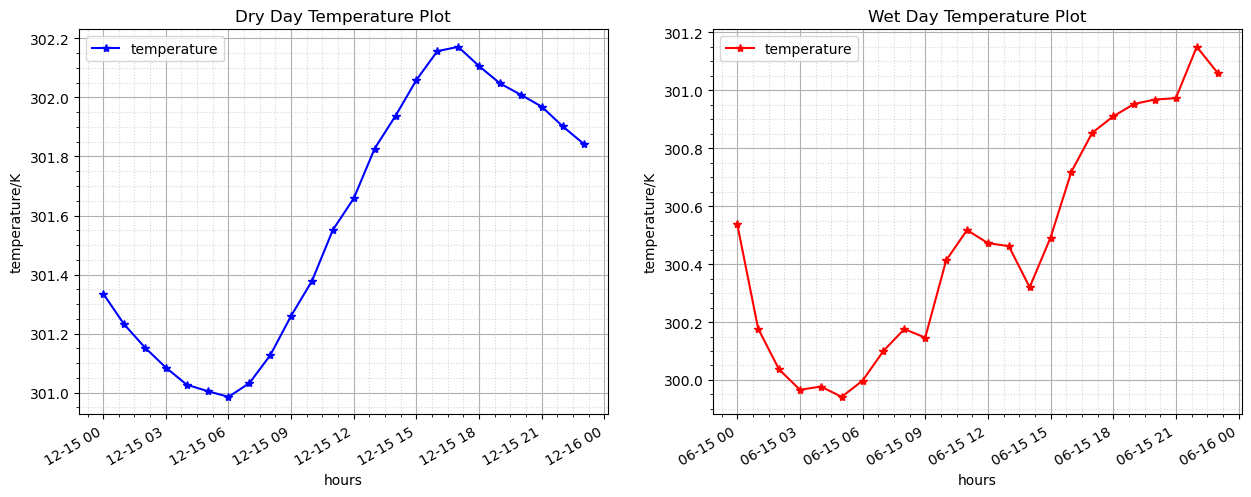

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
Dry_day_temperature_plot.plot(marker='*',linestyle='-',color='blue',label='temperature')
plt.xlabel('hours')
plt.ylabel('temperature/K')
plt.title('Dry Day Temperature Plot')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
Wet_day_temperature_plot.plot(marker='*',linestyle='-',color='red',label='temperature')
plt.xlabel('hours')
plt.ylabel('temperature/K')
plt.title('Wet Day Temperature Plot')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()

plt.show()

# EXTRACTING BOUNDARY LAYER HEIGHT DRY DAY DATASET

In [19]:
BLH_dry_day = merged_dataset_average['blh'].sel(valid_time='2023-12-15',longitude=slice('-3.24','1.01'),latitude=slice('4.71','10.96'))
print(BLH_dry_day)

<xarray.DataArray 'blh' (valid_time: 24, latitude: 1, longitude: 5)>
array([[[502.52365, 509.58615, 527.10175, 542.6486 , 555.7424 ]],

       [[497.7619 , 500.87128, 509.73065, 514.09   , 518.2619 ]],

       [[487.91827, 489.84015, 494.23077, 492.69952, 489.3714 ]],

       [[477.5327 , 477.9077 , 478.2827 , 472.79834, 468.8452 ]],

       [[471.42163, 466.35913, 461.7185 , 453.45288, 444.32788]],

       [[465.86536, 455.92786, 449.80286, 442.17786, 433.1466 ]],

       [[449.77188, 439.00626, 432.9125 , 429.67813, 419.475  ]],

       [[443.6692 , 423.76294, 415.0442 , 412.5442 , 402.6692 ]],

       [[448.11383, 411.58258, 396.0982 , 391.08258, 386.39508]],

       [[462.25055, 415.35992, 401.93805, 396.23492, 397.0318 ]],

...
       [[606.75903, 612.6028 , 628.0403 , 635.88403, 639.6653 ]],

       [[579.95404, 593.5478 , 622.9853 , 638.01654, 645.64154]],

       [[543.06055, 559.99805, 599.5918 , 617.74805, 627.62305]],

       [[511.24747, 532.62244, 564.55994, 586.5287 , 605

# CONVERTING 3D DATAARRAY TO 1D DATASET

In [20]:
BLH_dry_day_plot = BLH_dry_day.mean(dim=['latitude','longitude'])
print(BLH_dry_day_plot)

<xarray.DataArray 'blh' (valid_time: 24)>
array([527.5205 , 508.14316, 490.812  , 475.07333, 459.456  , 449.3841 ,
       434.16876, 419.53793, 406.65445, 414.56305, 458.05963, 520.41016,
       580.0647 , 618.27673, 624.5903 , 616.02905, 589.6043 , 560.0537 ,
       523.81464, 498.31635, 475.26547, 452.84653, 448.70743, 434.28476],
      dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-12-15 ... 2023-12-15T23:00:00


# EXTRACTING BOUNDARY LAYER HEIGHT WET DAY DATASET

In [21]:
BLH_wet_day = merged_dataset_average['blh'].sel(valid_time='2023-06-15',longitude=slice('-3.24','1.01'),latitude=slice('4.71','10.96'))
print(BLH_wet_day)

<xarray.DataArray 'blh' (valid_time: 24, latitude: 1, longitude: 5)>
array([[[906.15283, 888.02783, 860.3716 , 825.66846, 814.46533]],

       [[837.65564, 860.85876, 858.2494 , 839.89   , 841.79626]],

       [[827.07825, 809.51575, 804.9376 , 811.4689 , 829.5001 ]],

       [[823.15857, 815.47107, 789.2992 , 782.58044, 803.0023 ]],

       [[787.2319 , 775.0131 , 783.435  , 789.77875, 805.3725 ]],

       [[787.6138 , 762.5825 , 756.6138 , 755.34814, 761.77   ]],

       [[838.42865, 792.3193 , 755.8974 , 728.61615, 719.2568 ]],

       [[874.39185, 863.9231 , 815.0637 , 770.8137 , 753.7512 ]],

       [[827.88464, 827.4315 , 836.5409 , 833.6815 , 810.619  ]],

       [[848.7637 , 832.4199 , 841.5137 , 862.8262 , 862.4199 ]],

...
       [[855.2583 , 852.1333 , 845.35205, 840.7583 , 838.91455]],

       [[883.0723 , 896.2286 , 901.3536 , 875.5098 , 843.3848 ]],

       [[912.71027, 909.3665 , 915.96027, 916.58527, 918.96027]],

       [[919.34094, 925.1222 , 932.40344, 939.52844, 941

# CONVERTING 3D DATAARRAY TO 1D DATASET

In [22]:
BLH_wet_day_plot = BLH_wet_day.mean(dim=['latitude','longitude'])
print(BLH_wet_day_plot)

<xarray.DataArray 'blh' (valid_time: 24)>
array([858.9372 , 847.69006, 816.5001 , 802.70233, 788.16626, 764.78564,
       766.9037 , 815.58875, 827.23157, 849.5887 , 842.78455, 866.9821 ,
       868.94824, 876.4469 , 846.4833 , 879.90985, 914.7165 , 931.6722 ,
       955.7573 , 957.77637, 951.18976, 960.83105, 942.2448 , 941.4998 ],
      dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-06-15 ... 2023-06-15T23:00:00


#   BOUNDARY LAYER HEIGHT TIME SERIES PLOT FOR DRY DAY (2023-12-15) vs  BOUNDARY LAYER HEIGHT SERIES PLOT FOR WET DAY (2023-06-15)

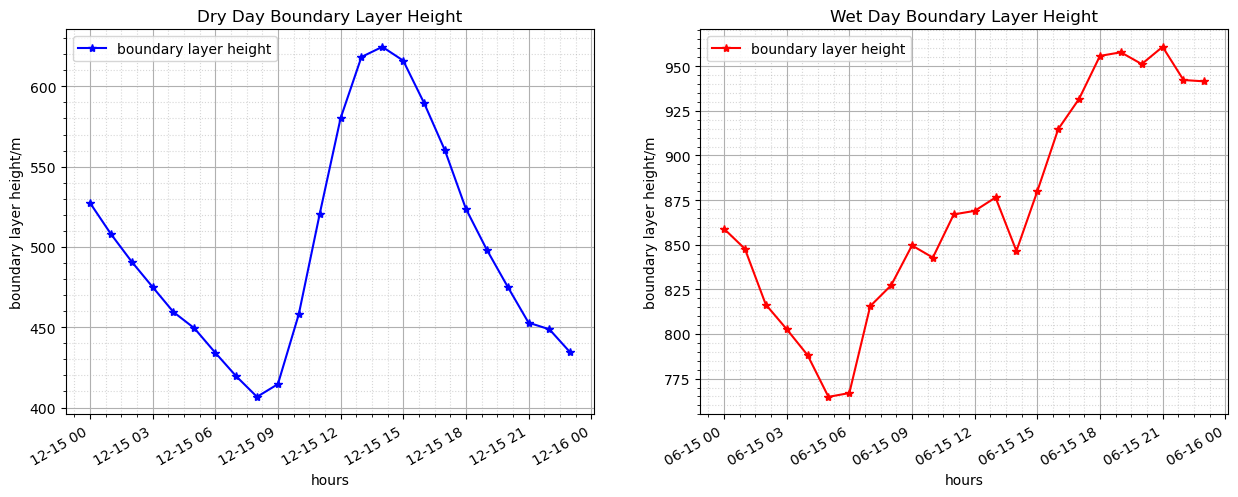

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
BLH_dry_day_plot.plot(marker='*',linestyle='-',color='blue',label='boundary layer height')
plt.xlabel('hours')
plt.ylabel('boundary layer height/m')
plt.title('Dry Day Boundary Layer Height')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
BLH_wet_day_plot.plot(marker='*',linestyle='-',color='red',label='boundary layer height')
plt.xlabel('hours')
plt.ylabel('boundary layer height/m')
plt.title('Wet Day Boundary Layer Height')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.legend()

plt.show()

# FINDING MEAN ACROSS 2023 BY MONTH

In [13]:
monthly_variation = merged_dataset_average.groupby('valid_time.month').mean(dim='valid_time')
monthly_variation

<xarray.Dataset>
Dimensions:    (latitude: 26, longitude: 18, month: 12)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude  (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    d2m        (month, latitude, longitude) float32 278.3 278.3 ... 297.1 297.1
    u10        (month, latitude, longitude) float32 -1.609 -1.615 ... 1.74 1.757
    v10        (month, latitude, longitude) float32 -1.666 -1.657 ... 1.805
    t2m        (month, latitude, longitude) float32 300.7 300.8 ... 301.8 301.8
    blh        (month, latitude, longitude) float32 653.6 652.1 ... 575.3 573.6
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-12T19:10 GRIB to CDM+CF via cfgrib-0.9.1...

# CONVERTING 3D DATAARRAY TO 1D DATASET

In [14]:
_1D_avg = monthly_variation.mean(dim=['latitude','longitude'])
_1D_avg

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
    number   int64 0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    d2m      (month) float32 288.2 290.1 294.4 296.1 ... 296.8 297.0 295.9 289.5
    u10      (month) float32 -0.1204 0.02467 0.8322 ... 0.6099 0.4526 -0.3429
    v10      (month) float32 -0.01909 0.6725 1.733 1.929 ... 1.292 1.229 -0.2408
    t2m      (month) float32 300.9 302.6 302.7 302.5 ... 299.5 300.5 301.7 300.9
    blh      (month) float32 597.2 690.0 730.9 667.8 ... 425.3 431.6 553.8 524.1

# PLOTTING AVERAGE DEW POINT TEMPERATURE (2023)

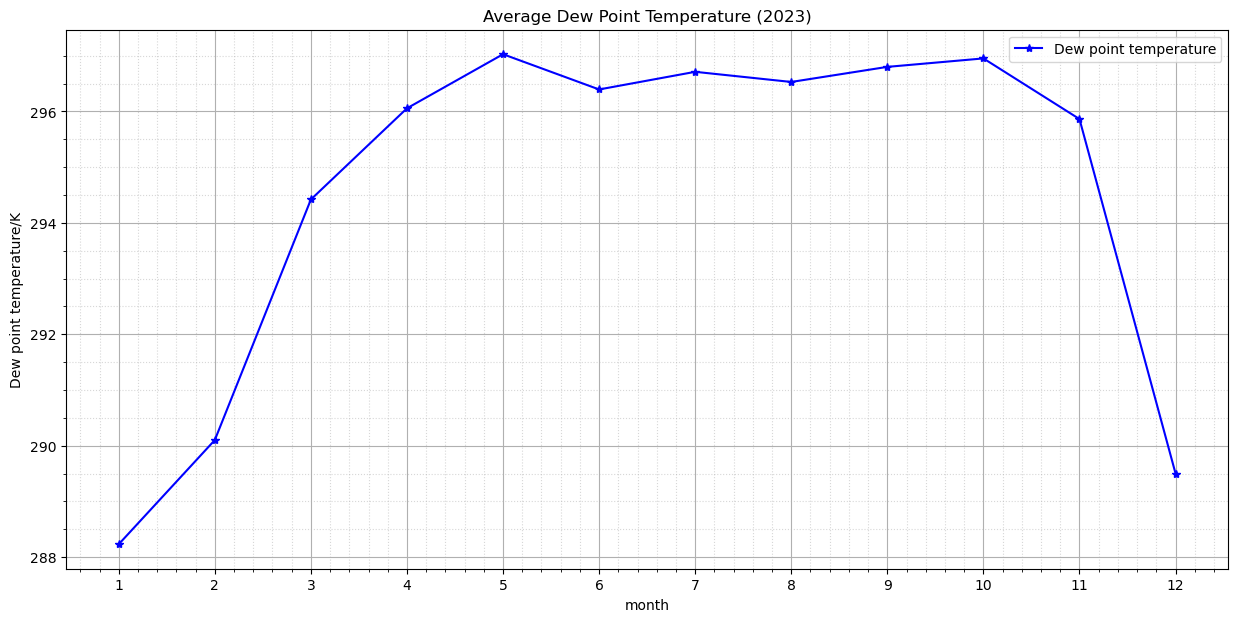

In [88]:
plt.figure(figsize=(15,7))

avg_dew_point_temp['d2m'].plot(marker='*',linestyle='-',color='blue',label='Dew point temperature')
plt.xlabel('month')
plt.ylabel('Dew point temperature/K')
plt.title('Average Dew Point Temperature (2023)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.xticks(avg_dew_point_temp['month'].values[::1])

plt.legend()
plt.show()

# COMPUTING AVERAGE WIND SPEED (2023) 

In [15]:
u_10 = monthly_variation['u10']
v_10 = monthly_variation['v10']
avg_wind_speed = np.sqrt(u_10**2 + v_10**2)
avg_wind_speed

<xarray.DataArray (month: 12, latitude: 26, longitude: 18)>
array([[[2.315486  , 2.3133361 , 2.285426  , ..., 2.4633107 ,
         2.4818497 , 2.4860344 ],
        [2.1669693 , 2.160616  , 2.1855361 , ..., 2.4400833 ,
         2.3846447 , 2.3440566 ],
        [2.1261625 , 2.1018846 , 2.1383092 , ..., 2.270421  ,
         2.1631546 , 2.0819724 ],
        ...,
        [2.0870283 , 1.8381504 , 1.7639248 , ..., 4.0077147 ,
         3.9637656 , 3.8989832 ],
        [3.2458007 , 3.1291707 , 3.0992184 , ..., 3.9232116 ,
         3.8773897 , 3.8104396 ],
        [3.6570406 , 3.6672893 , 3.616198  , ..., 3.7714584 ,
         3.7345612 , 3.7127724 ]],

       [[2.074551  , 2.1082733 , 2.1661904 , ..., 2.0665834 ,
         2.1323562 , 2.2210107 ],
        [1.89293   , 1.9243733 , 2.0256846 , ..., 1.8838171 ,
         1.902436  , 1.9771646 ],
        [1.756649  , 1.7815166 , 1.8834023 , ..., 1.5467018 ,
         1.564425  , 1.6885766 ],
...
        [1.8533382 , 1.6281139 , 1.5705168 , ..., 3.9240963 ,
         3.8911417 , 3.8525312 ],
        [2.923836  , 2.8111    , 2.7511685 , ..., 3.801134  ,
         3.7838635 , 3.7425647 ],
        [3.3537667 , 3.360718  , 3.2942832 , ..., 3.6686707 ,
         3.659248  , 3.661767  ]],

       [[2.346132  , 2.3757555 , 2.372894  , ..., 2.5714276 ,
         2.6152904 , 2.6602743 ],
        [2.1810105 , 2.2092612 , 2.26034   , ..., 2.4614036 ,
         2.4790182 , 2.494573  ],
        [2.0794063 , 2.082397  , 2.1323342 , ..., 2.2421472 ,
         2.2109113 , 2.190871  ],
        ...,
        [1.4061826 , 1.2410847 , 1.1952597 , ..., 2.8800402 ,
         2.8372853 , 2.797237  ],
        [2.3068125 , 2.2404594 , 2.2389498 , ..., 2.7188373 ,
         2.6755304 , 2.6320958 ],
        [2.6070359 , 2.624741  , 2.6026857 , ..., 2.5700202 ,
         2.5376499 , 2.5187697 ]]], dtype=float32)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude  (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# CONVERTING 3D DATAARRAY TO 1D DATASET

In [16]:
wind_avg = avg_wind_speed.mean(dim=['latitude','longitude'])
wind_avg

<xarray.DataArray (month: 12)>
array([1.6368191, 1.6040884, 2.001447 , 2.2107573, 2.034553 , 2.54572  ,
       2.221234 , 2.2461047, 1.9200476, 1.5186939, 1.4085592, 1.4124864],
      dtype=float32)
Coordinates:
    number   int64 0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

#  PLOTTING AVERAGE WIND SPEED (2023)

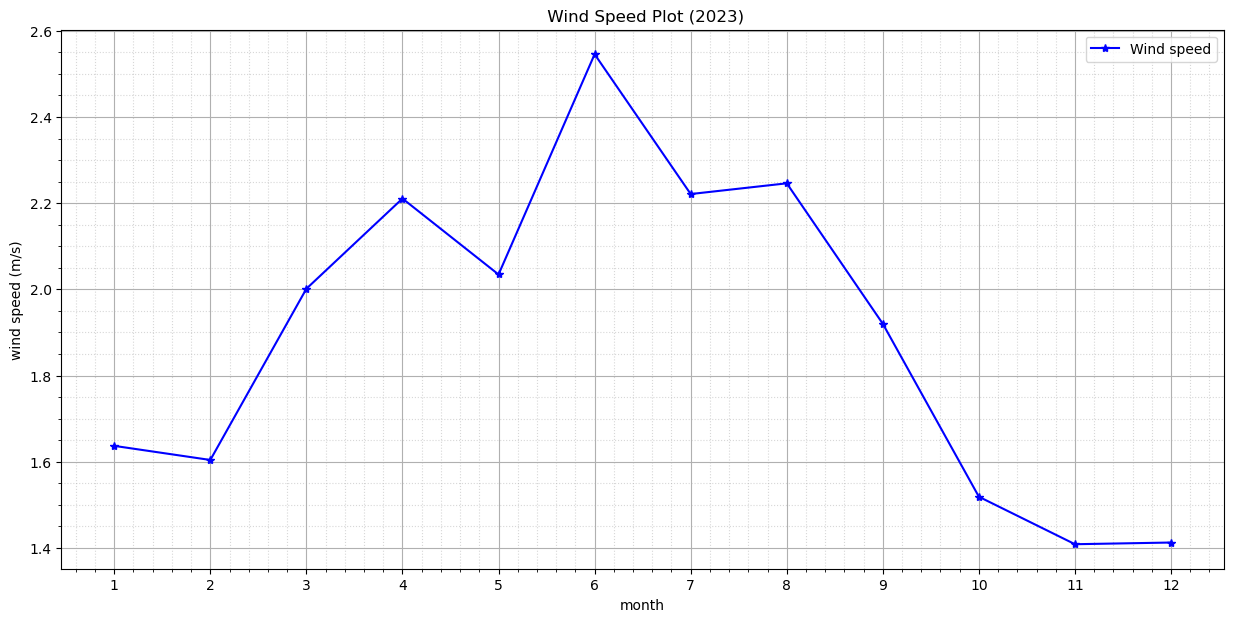

In [87]:
plt.figure(figsize=(15,7))

wind_avg.plot(color='blue',label='Wind speed',marker='*')
plt.xlabel('month')
plt.ylabel('wind speed (m/s)')
plt.title(' Wind Speed Plot (2023)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.xticks(wind_avg['month'].values[::1])

plt.legend()

plt.show()

# EXTRACTING TEMPERATURE DATASET

In [17]:
avg_temp = monthly_variation['t2m']
avg_temp

<xarray.DataArray 't2m' (month: 12, latitude: 26, longitude: 18)>
array([[[300.67905, 300.75092, 300.65146, ..., 300.40808, 300.96527,
         301.12177],
        [300.48123, 300.5969 , 300.5008 , ..., 300.75253, 301.0801 ,
         301.1021 ],
        [300.3289 , 300.44522, 300.35452, ..., 301.10965, 301.2406 ,
         301.0123 ],
        ...,
        [300.3954 , 300.23947, 300.0397 , ..., 300.73972, 300.77106,
         300.75986],
        [300.55396, 300.4466 , 300.4577 , ..., 300.88837, 300.89917,
         300.884  ],
        [300.6293 , 300.66656, 300.679  , ..., 300.9638 , 300.96466,
         300.93787]],

       [[303.50775, 303.64127, 303.62845, ..., 303.51263, 304.16638,
         304.33722],
        [303.277  , 303.44885, 303.42203, ..., 303.89276, 304.26675,
         304.2457 ],
        [303.1352 , 303.29712, 303.2829 , ..., 304.0857 , 304.23788,
         303.8148 ],
...
        [300.89645, 300.68582, 300.42996, ..., 301.02176, 301.0422 ,
         301.03052],
        [300.74487, 300.60718, 300.589  , ..., 300.9842 , 300.9663 ,
         300.9445 ],
        [300.5891 , 300.61676, 300.60672, ..., 300.90137, 300.88232,
         300.85675]],

       [[300.482  , 300.47275, 300.1067 , ..., 300.847  , 301.5521 ,
         301.65457],
        [300.27292, 300.34912, 300.06656, ..., 300.9443 , 301.53815,
         301.3739 ],
        [299.7926 , 299.94595, 299.75372, ..., 301.20737, 301.41565,
         300.87326],
        ...,
        [301.24124, 300.99084, 300.68622, ..., 301.78357, 301.8033 ,
         301.80026],
        [301.4842 , 301.30472, 301.27478, ..., 301.81616, 301.81497,
         301.7988 ],
        [301.52435, 301.53876, 301.51526, ..., 301.79794, 301.79315,
         301.77258]]], dtype=float32)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude  (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      468
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

# CONVERTING 3D DATASET TO 1D DATAARRAY

In [74]:
temp_avg = avg_temp.mean(dim=['latitude','longitude'])
temp_avg

<xarray.DataArray 't2m' (month: 12)>
array([300.89163, 302.59354, 302.6669 , 302.51376, 301.93427, 300.07556,
       299.50784, 298.9136 , 299.52884, 300.50568, 301.65298, 300.86288],
      dtype=float32)
Coordinates:
    number   int64 0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# PLOTTING AVERAGE TEMPERATURE (2023) 

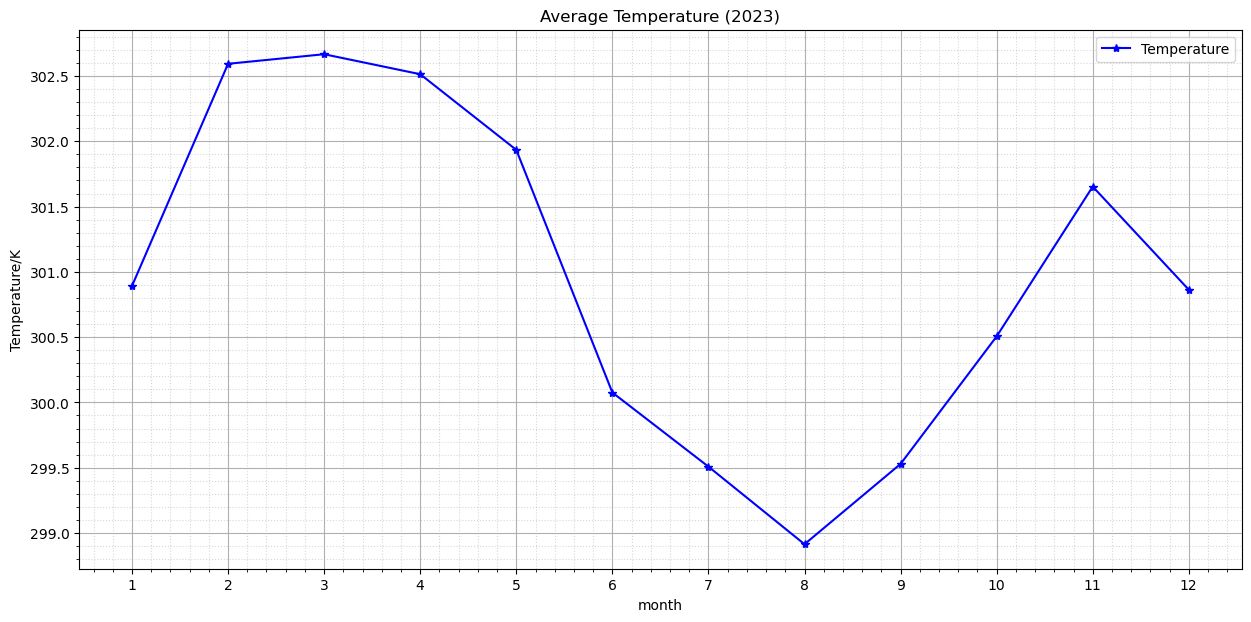

In [86]:
plt.figure(figsize=(15,7))

temp_avg.plot(marker='*',linestyle='-',color='blue',label='Temperature')
plt.xlabel('month')
plt.ylabel('Temperature/K')
plt.title('Average Temperature (2023)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.xticks(temp_avg['month'].values[::1])

plt.legend()
plt.show()

# EXTRACTING BOUNDARY LAYER HEIGHT DATASET

In [82]:
blh = monthly_variation['blh']
blh

<xarray.DataArray 'blh' (month: 12, latitude: 26, longitude: 18)>
array([[[ 653.6144 ,  652.0542 ,  652.8621 , ...,  505.44955,
          557.37146,  590.4517 ],
        [ 641.4399 ,  639.0395 ,  633.7459 , ...,  516.73584,
          568.5181 ,  589.72156],
        [ 634.9277 ,  631.7324 ,  621.99426, ...,  537.8871 ,
          576.96796,  595.4959 ],
        ...,
        [ 481.44244,  469.55658,  448.45758, ...,  497.25723,
          501.33987,  500.06238],
        [ 486.4712 ,  477.2098 ,  476.9327 , ...,  535.4835 ,
          536.82996,  534.7614 ],
        [ 497.3298 ,  502.4241 ,  504.75348, ...,  563.5495 ,
          562.8117 ,  555.20807]],

       [[ 765.318  ,  770.9566 ,  779.51263, ...,  672.7528 ,
          741.0042 ,  778.54175],
        [ 737.0373 ,  740.52606,  744.09406, ...,  696.94836,
          749.68164,  778.705  ],
        [ 724.0233 ,  724.6079 ,  724.6734 , ...,  700.1726 ,
          745.5171 ,  764.5793 ],
...
        [ 451.4077 ,  411.26306,  373.19266, ...,  548.87244,
          553.5775 ,  551.70074],
        [ 506.70898,  479.09332,  470.10928, ...,  558.0668 ,
          555.3739 ,  551.46387],
        [ 519.49756,  520.8637 ,  515.38965, ...,  552.41925,
          548.74304,  541.9907 ]],

       [[ 599.54706,  584.1999 ,  553.71857, ...,  550.5823 ,
          596.8263 ,  620.3802 ],
        [ 574.87244,  567.26746,  543.90955, ...,  534.4904 ,
          583.8803 ,  596.1954 ],
        [ 516.10583,  518.0112 ,  506.96237, ...,  525.4785 ,
          563.3486 ,  567.80597],
        ...,
        [ 452.33447,  432.7873 ,  410.7055 , ...,  517.9078 ,
          523.66675,  525.471  ],
        [ 487.67883,  472.1555 ,  459.0921 , ...,  550.0377 ,
          552.8216 ,  553.8373 ],
        [ 510.00568,  509.59088,  501.0319 , ...,  573.10345,
          575.26166,  573.6217 ]]], dtype=float32)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude  (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/32)
    GRIB_paramId:                             159
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      468
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Boundary layer height
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

# CONVERTING 3D DATASET TO 1D DATAARRAY

In [83]:
_1D_blh = blh.mean(dim=['latitude','longitude'])
_1D_blh

<xarray.DataArray 'blh' (month: 12)>
array([597.15186, 690.0365 , 730.9311 , 667.83545, 579.9263 , 554.39465,
       463.36557, 448.51877, 425.33212, 431.59088, 553.78455, 524.12994],
      dtype=float32)
Coordinates:
    number   int64 0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

#  PLOTTING AVERAGE BOUNDARY LAYER HEIGHT (2023) 

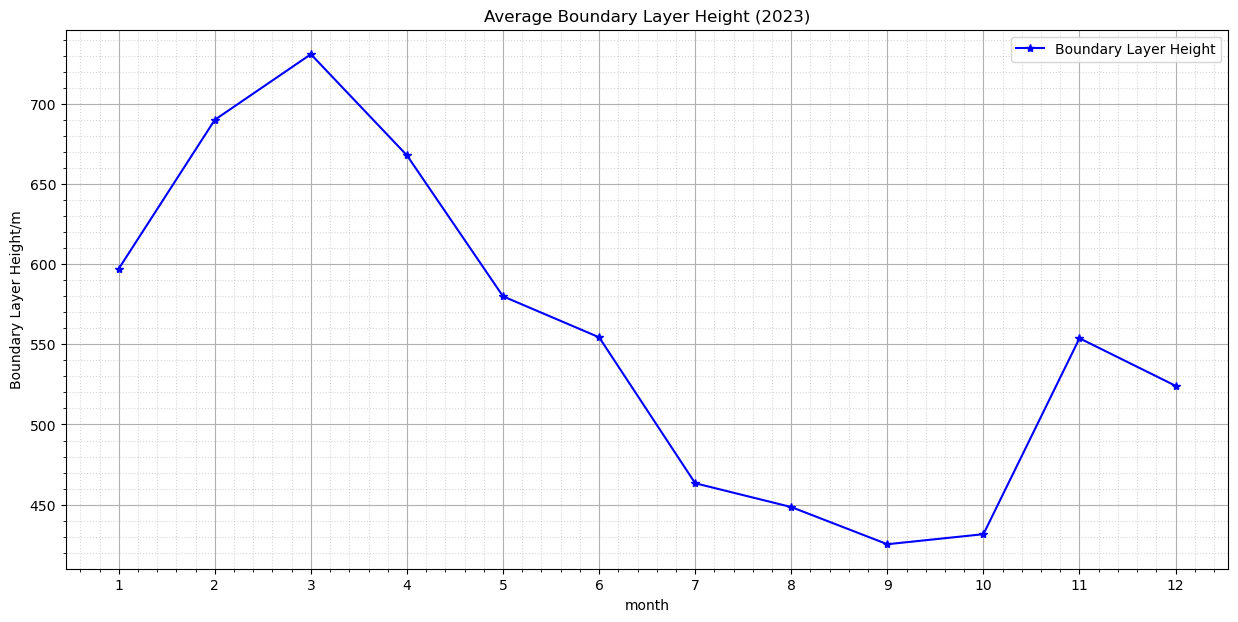

In [85]:
plt.figure(figsize=(15,7))

_1D_blh.plot(marker='*',linestyle='-',color='blue',label='Boundary Layer Height')
plt.xlabel('month')
plt.ylabel('Boundary Layer Height/m')
plt.title('Average Boundary Layer Height (2023)')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.xticks(_1D_blh['month'].values[::1])

plt.legend()
plt.show()

# EXTRACTING VARIABLES AND FINDING SEASNAL MEAN

In [22]:
seasons = merged_dataset_average.groupby('valid_time.season').mean(dim='valid_time')
seasons

<xarray.Dataset>
Dimensions:    (latitude: 26, longitude: 18, season: 4)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 10.96 10.71 10.46 10.21 ... 5.21 4.96 4.71
  * longitude  (longitude) float64 -3.24 -2.99 -2.74 -2.49 ... 0.51 0.76 1.01
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    d2m        (season, latitude, longitude) float32 278.9 279.0 ... 296.9 296.9
    u10        (season, latitude, longitude) float32 -1.694 -1.711 ... 3.08
    v10        (season, latitude, longitude) float32 -1.455 -1.464 ... 2.884
    t2m        (season, latitude, longitude) float32 301.5 301.6 ... 300.0 300.0
    blh        (season, latitude, longitude) float32 669.7 665.7 ... 521.4 519.3
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-12T19:10 GRIB to CDM+CF via cfgrib-0.9.1...

# CONVERTING 3D DATASET TO 1D DATAARRAY

In [28]:
_1D_seasons = seasons.mean(dim = ['latitude','longitude'])
_1D_seasons

<xarray.Dataset>
Dimensions:  (season: 4)
Coordinates:
    number   int64 0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    d2m      (season) float32 289.3 296.5 295.8 296.5
    u10      (season) float32 -0.1519 1.369 0.8488 0.7087
    v10      (season) float32 0.1197 1.864 1.842 1.353
    t2m      (season) float32 301.4 299.5 302.4 300.6
    blh      (season) float32 600.9 488.0 659.5 469.8

# CALCULATING WIND SPEED

In [54]:
u_10 = _1D_seasons['u10']
v_10 = _1D_seasons['v10']
season_wind_speed = np.sqrt(u_10**2 + v_10**2)
season_wind_speed

<xarray.DataArray (season: 4)>
array([0.19340283, 2.312803  , 2.028579  , 1.5272249 ], dtype=float32)
Coordinates:
    number   int64 0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

# TIME SERIES CHART OF PARAMETERS AGAINST SEASONS

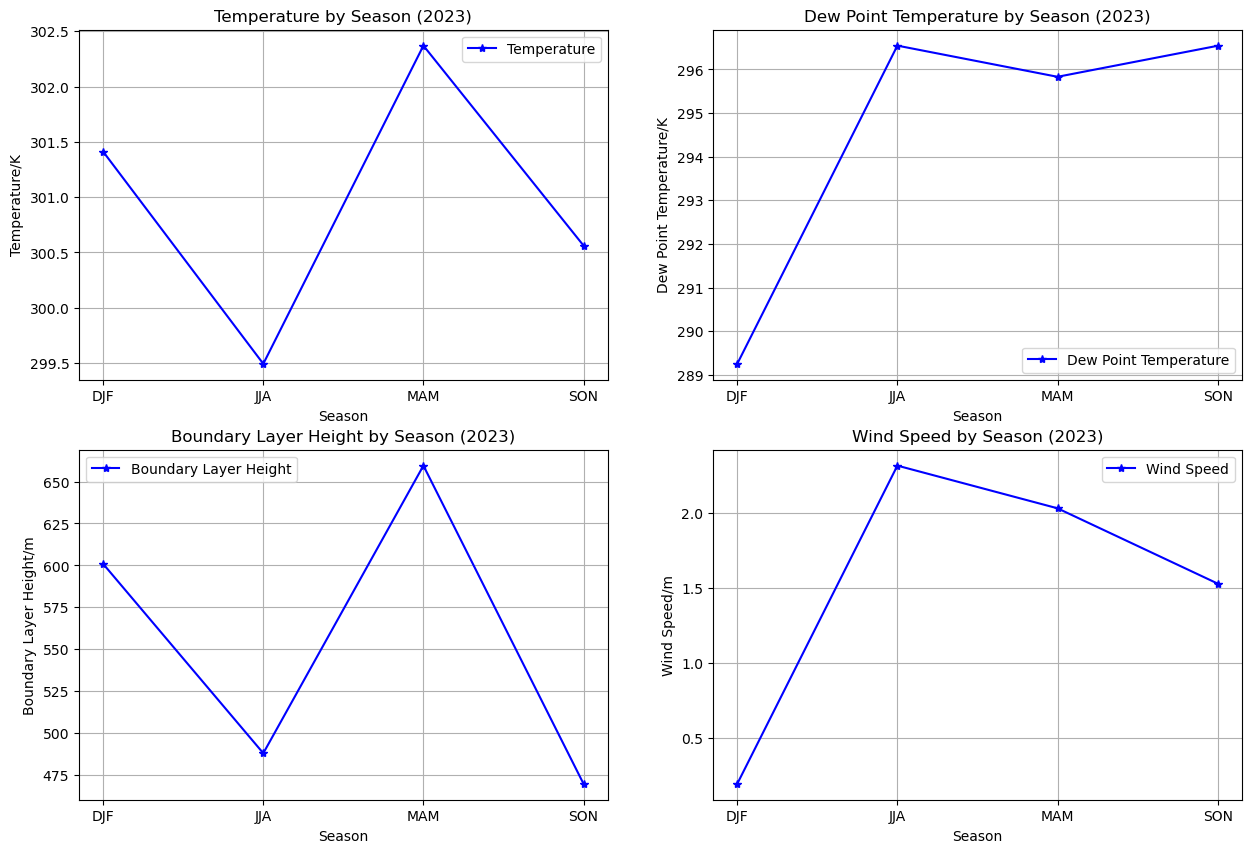

In [58]:

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
seasons = _1D_seasons['season'].values
temperatures = _1D_seasons['t2m'].values
x_numeric = np.arange(len(seasons))
plt.plot(x_numeric, temperatures, marker='*', linestyle='-', color='blue', label='Temperature')
plt.xticks(x_numeric, seasons)
plt.xlabel('Season')
plt.ylabel('Temperature/K')
plt.title('Temperature by Season (2023)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
seasons = _1D_seasons['season'].values
dew_point_temperature = _1D_seasons['d2m'].values
x_values = np.arange(len(seasons))
plt.plot(x_values, dew_point_temperature, marker='*', linestyle='-', color='blue', label='Dew Point Temperature')
plt.xticks(x_values, seasons)
plt.xlabel('Season')
plt.ylabel('Dew Point Temperature/K')
plt.title('Dew Point Temperature by Season (2023)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
seasons = _1D_seasons['season'].values
boundary_layer_height = _1D_seasons['blh'].values
x_values = np.arange(len(seasons))
plt.plot(x_values, boundary_layer_height, marker='*', linestyle='-', color='blue', label='Boundary Layer Height')
plt.xticks(x_values, seasons)
plt.xlabel('Season')
plt.ylabel('Boundary Layer Height/m')
plt.title('Boundary Layer Height by Season (2023)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
seasons = _1D_seasons['season'].values
wind_speeed = season_wind_speed.values
x_values = np.arange(len(seasons))
plt.plot(x_values, wind_speeed, marker='*', linestyle='-', color='blue', label='Wind Speed')
plt.xticks(x_values, seasons)
plt.xlabel('Season')
plt.ylabel('Wind Speed/m')
plt.title('Wind Speed by Season (2023)')
plt.legend()
plt.grid(True)

plt.show()


# BAR CHART OF PARAMETERS AGAINST SEASONS

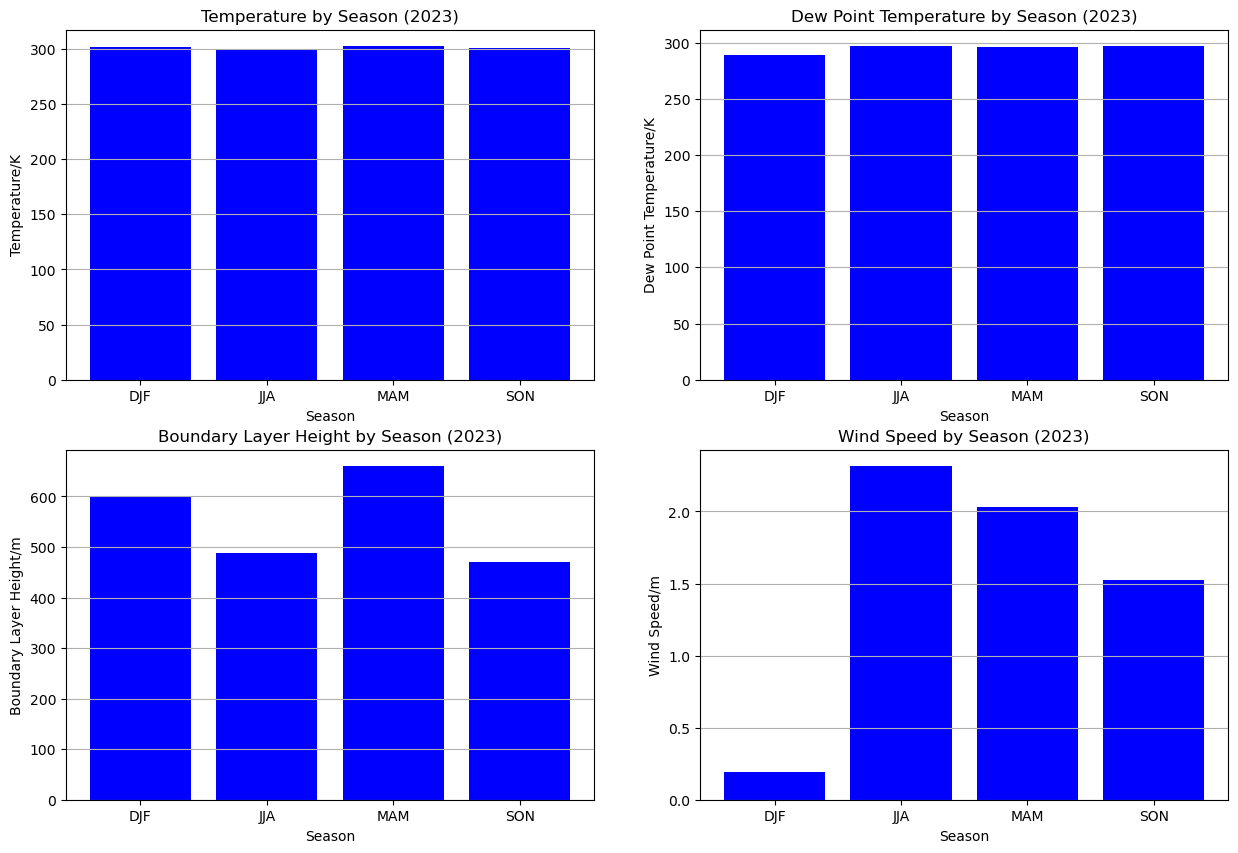

In [71]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
seasons = _1D_seasons['season'].values
temperatures = _1D_seasons['t2m'].values
x_numeric = np.arange(len(seasons))
plt.bar(x_numeric, temperatures,color='blue', label='Temperature')
plt.xticks(x_numeric, seasons)
plt.xlabel('Season')
plt.ylabel('Temperature/K')
plt.title('Temperature by Season (2023)')
plt.grid(axis ='y',linestyle='-')


plt.subplot(2, 2, 2)
seasons = _1D_seasons['season'].values
dew_point_temperature = _1D_seasons['d2m'].values
x_values = np.arange(len(seasons))
plt.bar(x_values, dew_point_temperature, color='blue', label='Dew Point Temperature')
plt.xticks(x_values, seasons)
plt.xlabel('Season')
plt.ylabel('Dew Point Temperature/K')
plt.title('Dew Point Temperature by Season (2023)')
plt.grid(axis ='y',linestyle='-')


plt.subplot(2, 2, 3)
seasons = _1D_seasons['season'].values
boundary_layer_height = _1D_seasons['blh'].values
x_values = np.arange(len(seasons))
plt.bar(x_values, boundary_layer_height, color='blue', label='Boundary Layer Height')
plt.xticks(x_values, seasons)
plt.xlabel('Season')
plt.ylabel('Boundary Layer Height/m')
plt.title('Boundary Layer Height by Season (2023)')
plt.grid(axis ='y',linestyle='-')



plt.subplot(2, 2, 4)
seasons = _1D_seasons['season'].values
wind_speeed = season_wind_speed.values
x_values = np.arange(len(seasons))
plt.bar(x_values, wind_speeed, color='blue', label='Wind Speed')
plt.xticks(x_values, seasons)
plt.xlabel('Season')
plt.ylabel('Wind Speed/m')
plt.title('Wind Speed by Season (2023)')
plt.grid(axis ='y',linestyle='-')


plt.show()